In [1]:
import numpy as np
import pandas as pd

In [2]:
from tqdm.notebook import tqdm

In [6]:
!pip uninstall Top2Vec -y
!pip install Top2Vec
from top2vec import Top2Vec


Found existing installation: top2vec 1.0.28
Uninstalling top2vec-1.0.28:
  Successfully uninstalled top2vec-1.0.28
  Using cached top2vec-1.0.28-py3-none-any.whl (25 kB)


In [50]:
df = pd.read_csv('Dataset/Twitter/train.csv', encoding = "ISO-8859-1", header = None)[[0, 5]].rename(columns = {0: 'class_label', 5: 'text'})
# Mapping the target to 0 and 1
df['class_label'] = np.where(df['class_label']==4, 0, 1)
df = df[df['class_label'] == 1]
# df = df.sample(n = 3000)
df.head()

,class_label,text
0,1,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,is upset that he can't update his Facebook by ...
2,1,@Kenichan I dived many times for the ball. Man...
3,1,my whole body feels itchy and like its on fire
4,1,"@nationwideclass no, it's not behaving at all...."


In [51]:
#stoptokens = stoptokens.tokens('english')
import re
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
import preprocessor as p
def custom_standardization(input_data):
    processed_data = p.clean(input_data)
    lowercase_value = processed_data.lower()
    return lowercase_value

def tokenize_and_clean(text):
    text = custom_standardization(text)
    
    #Tokenize
    tweet_tokenizer = nltk.tokenize.TweetTokenizer()
    tokens = tweet_tokenizer.tokenize(text)
   
    # Remove single-character tokens
    tokens = [token for token in tokens if len(token) > 1]

    # Remove numbers
    tokens = [token for token in tokens if not token.isnumeric()]
    
    # Remove punctuation
    tokens = [token for token in tokens if token.isalpha()]

    # Lowercase all tokens (default_stoptokens are lowercase too)
    tokens = [token.lower() for token in tokens]

    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jasme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
tqdm.pandas()
df["tokens"] = df["text"].progress_apply(tokenize_and_clean)

  0%|          | 0/800000 [00:00<?, ?it/s]

In [53]:
%%time
model = Top2Vec(documents=(df['tokens'].values.tolist()), speed='deep-learn', workers = 12, min_count = 100)

2023-03-08 01:02:27,340 - top2vec - INFO - Pre-processing documents for training
2023-03-08 01:02:43,084 - top2vec - INFO - Creating joint document/word embedding
2023-03-08 04:49:52,481 - top2vec - INFO - Creating lower dimension embedding of documents
2023-03-08 05:03:58,169 - top2vec - INFO - Finding dense areas of documents
2023-03-08 05:05:16,485 - top2vec - INFO - Finding topics


CPU times: total: 3h 18min 44s
Wall time: 4h 3min 45s


In [54]:
model.get_num_topics()

3000

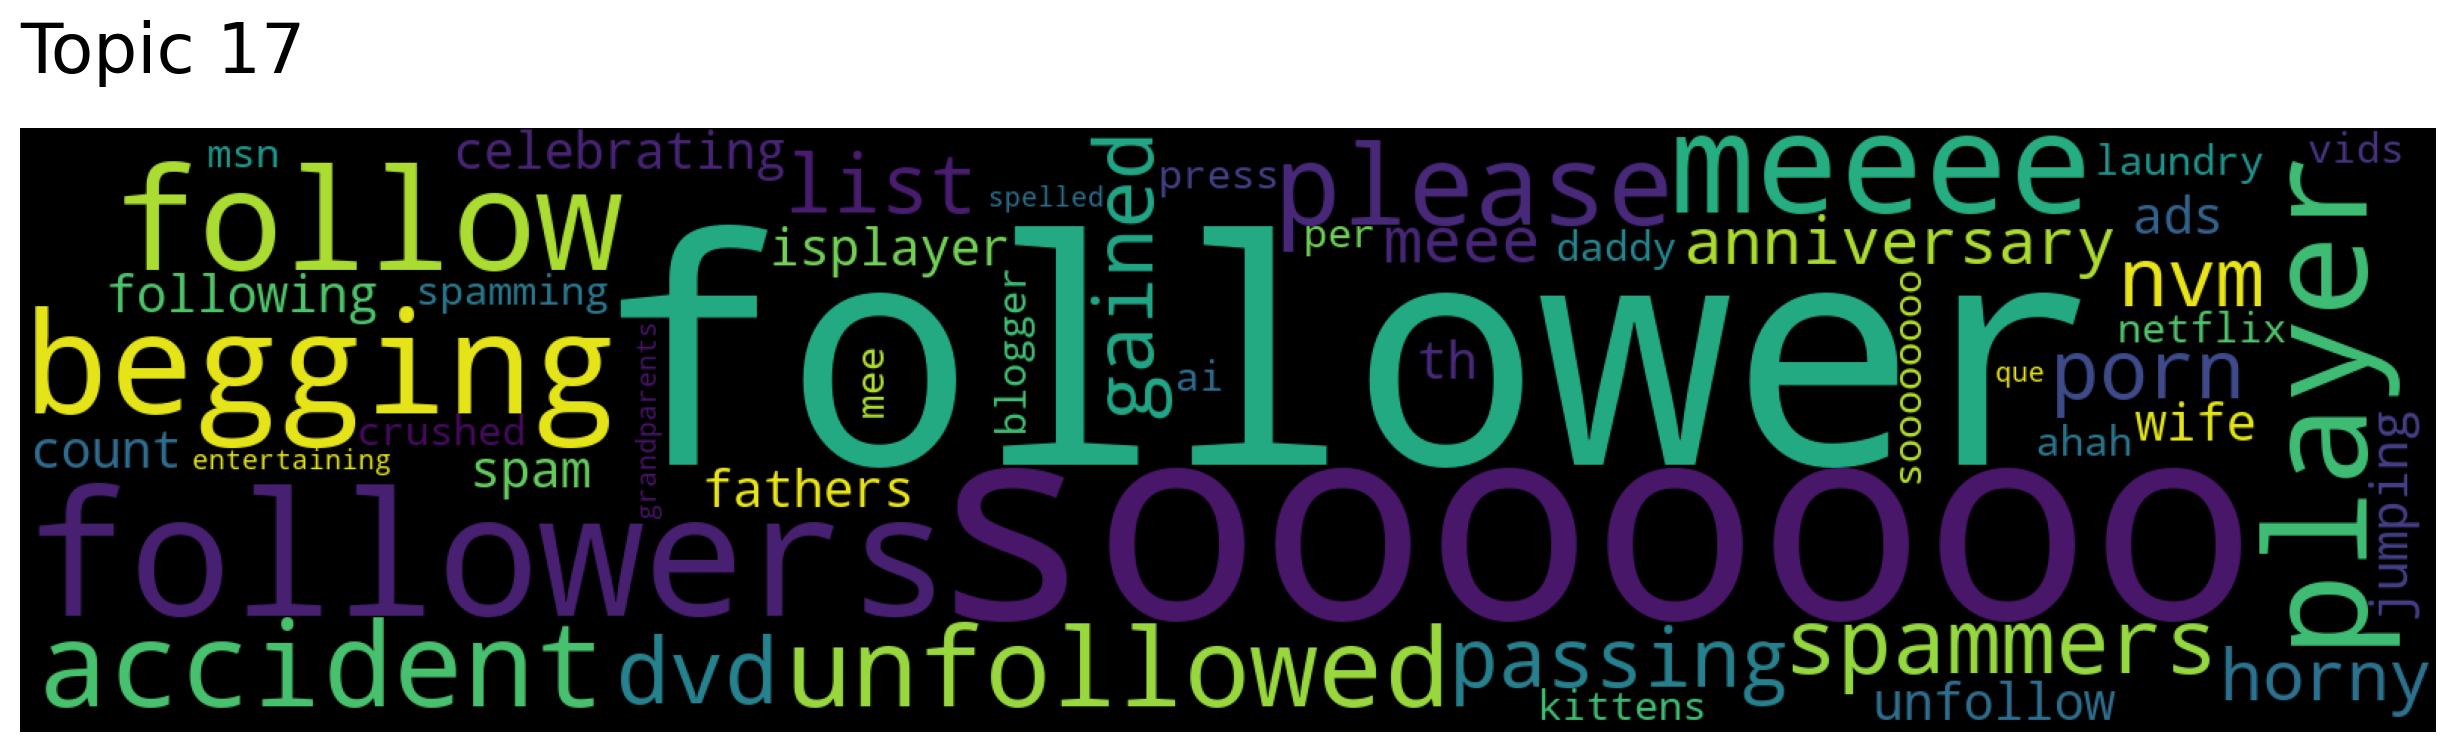

In [77]:
model.generate_topic_wordcloud(17)

In [78]:
model.save("top2vec.pkl")
model1 = Top2Vec.load("top2vec.pkl")

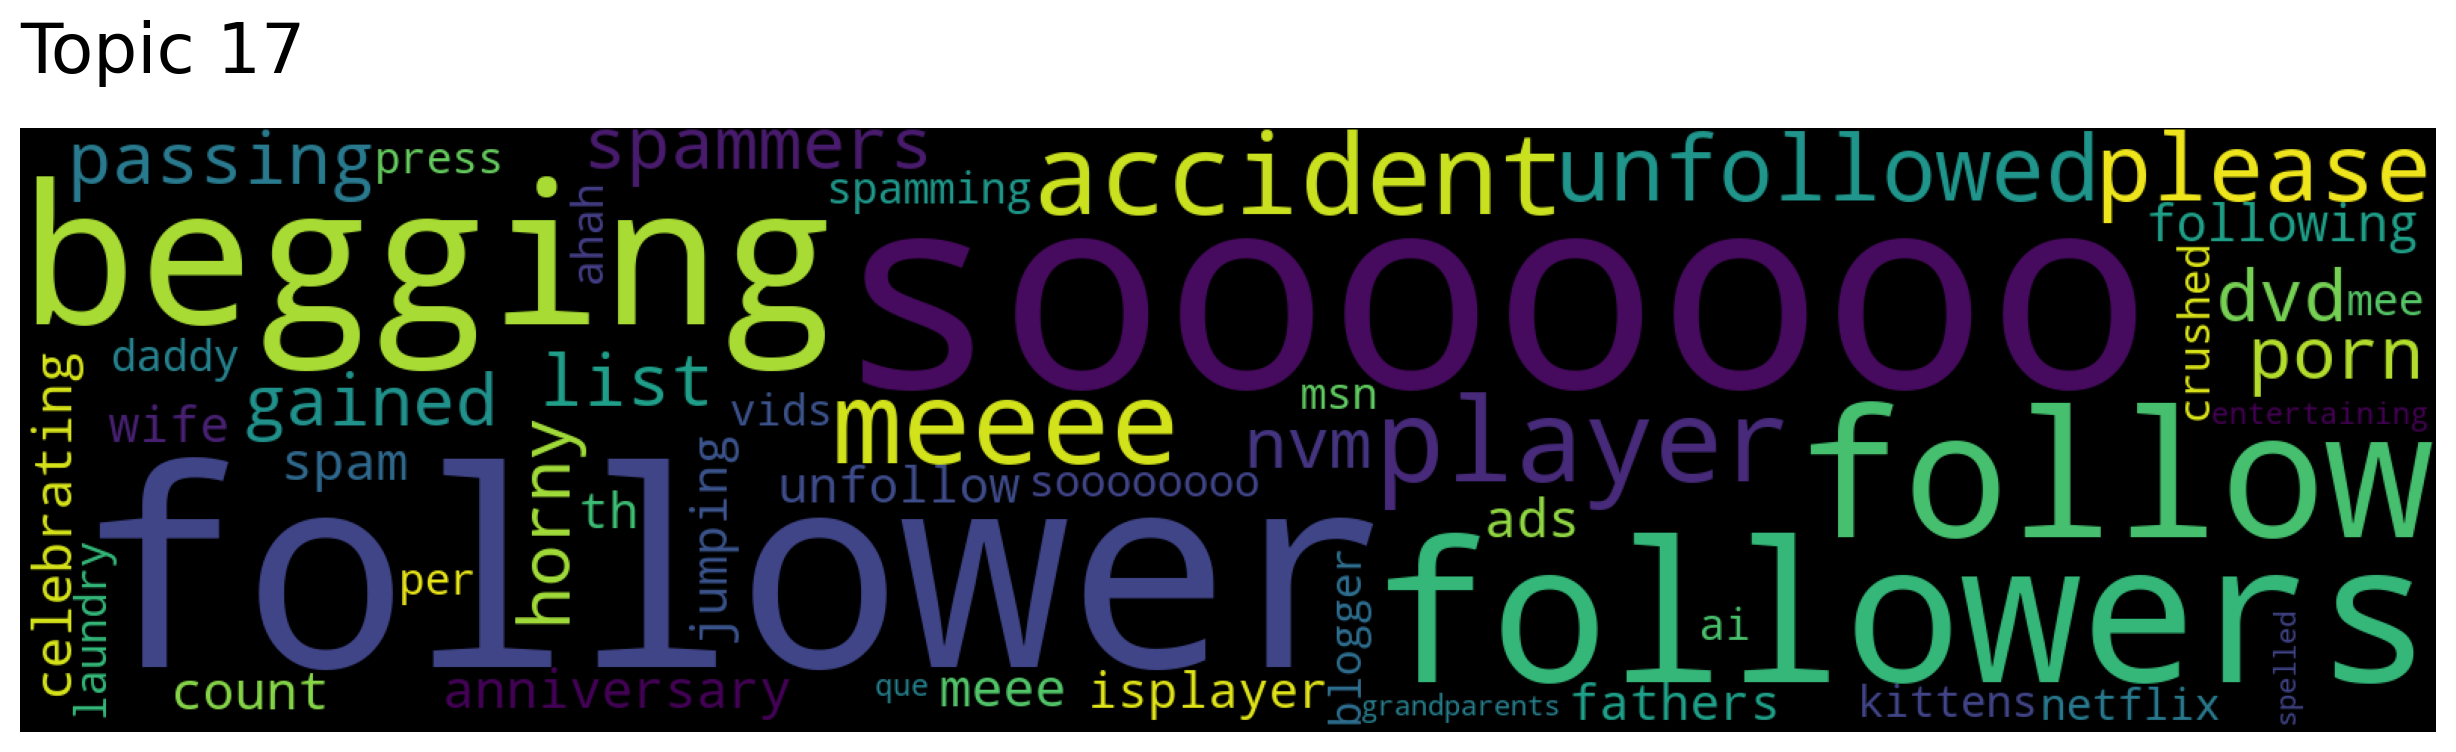

In [79]:
model1.generate_topic_wordcloud(17)